In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
moscow = pd.read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)

In [2]:
moscow.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />


Cleaning the Data

In [3]:
moscow = moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [4]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')

In [5]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')

In [8]:
moscow['Date'] = pd.to_datetime(moscow['Date'])

In [9]:
moscow.index = moscow['Date']

In [12]:
summer = moscow.loc[pd.datetime(2014,6,1) : pd.datetime(2014,8,31)]

In [13]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10.0,9.0,5.0,29,11,40.0,0.0,6.0,Rain,236.0
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10.0,10.0,9.0,47,5,68.0,0.0,6.0,Rain-Thunderstorm,35.0


In [14]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

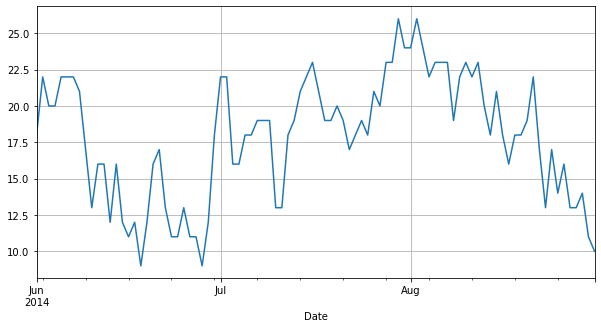

In [15]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Begining of June, July, early and late August looks good with temperature peaks

<AxesSubplot:xlabel='Date'>

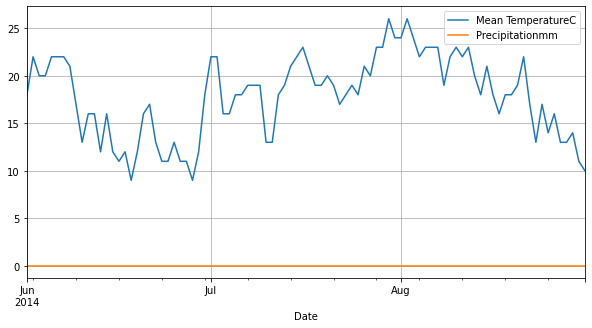

In [16]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

We have highest peak precipitation in the month of Aug. With different peaks in early june, early july an mid july. 
There was no rainfall through the period of June to Aug.

<AxesSubplot:xlabel='Date'>

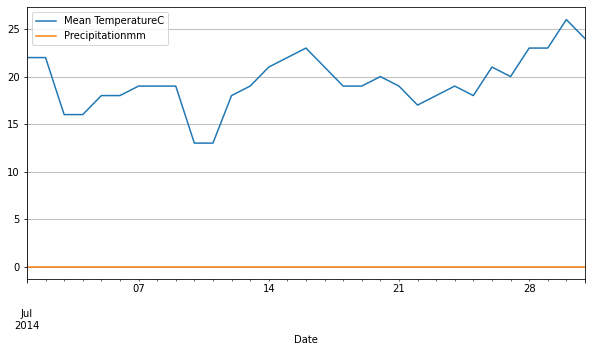

In [18]:
july = summer.loc[pd.datetime(2014,7,1) : pd.datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The temperature looks good with peaks in July 1st 15th and highest in 30th. There was no rainfall through the month of July.